In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
train_df = pd.read_csv('day.csv')
test_df = pd.read_csv('test.csv')

In [260]:
def cnt(x):
    return test_df['casual'][x] + test_df['registered'][x]
test_df['cnt'] = pd.Series(np.arange(len(test_df))).apply(lambda x: cnt(x))

In [261]:
df = pd.concat([train_df,test_df], axis = 0)
# concatenated to perform EDA due to less amount of data 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [262]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values

In [263]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,365.315501,2.499314,0.499314,6.528121,0.028807,2.998628,0.683128,1.393690,20.312731,23.719334,62.742276,12.767582,849.556927,3657.617284,4507.174211
std,210.962953,1.110792,0.500343,3.452120,0.167377,2.007198,0.465577,0.544719,7.509809,8.153715,14.233906,5.198304,686.900848,1560.525131,1937.210069
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.803347,16.887300,52.000000,9.041650,316.000000,2501.000000,3163.000000
50%,365.000000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.583300,12.125325,721.000000,3662.000000,4548.000000
75%,548.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.889153,30.461450,72.958300,15.625807,1097.000000,4790.000000,5976.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [264]:
print(df['holiday'].value_counts())
print(df['workingday'].value_counts())

0    708
1     21
Name: holiday, dtype: int64
1    498
0    231
Name: workingday, dtype: int64


In [265]:
df['weathersit'].value_counts()

1    463
2    245
3     21
Name: weathersit, dtype: int64

#### never once has occured condition 4 in which there heavy rain, snow or thunderstorm

<AxesSubplot:>

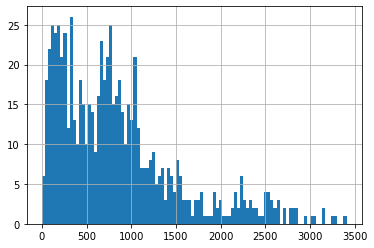

In [266]:
df['casual'].hist(bins = 100)

<AxesSubplot:>

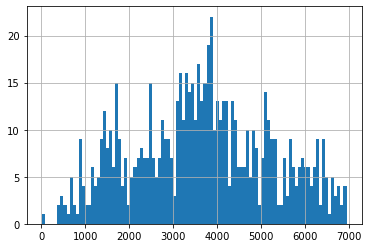

In [267]:
df['registered'].hist(bins = 100)

#### quantity of people buying casual bikes is way less than people buying registered bikes.

<AxesSubplot:>

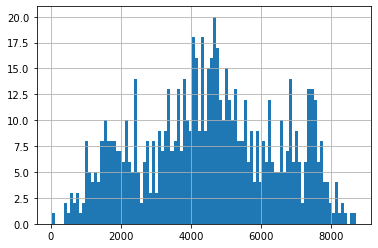

In [268]:
df['cnt'].hist(bins = 100)

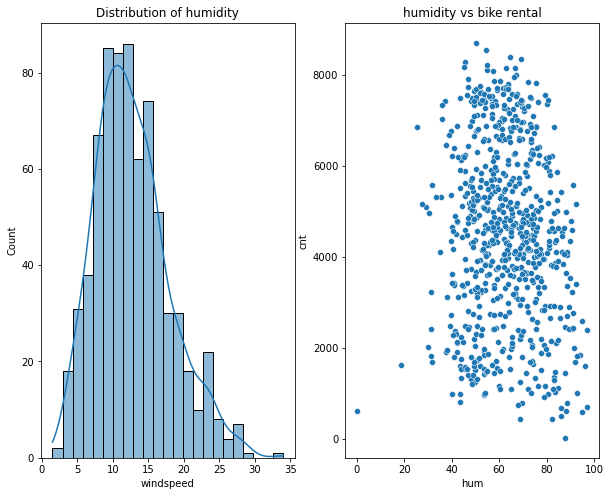

In [339]:
fig, axis = plt.subplots(1, 2, figsize=(10, 8))
plt.subplot(121)
plt.title('Distribution of humidity')
sns.histplot(df.windspeed, kde=True)
plt.subplot(122)
plt.title('humidity vs bike rental')
sns.scatterplot(x='hum', y='cnt', data=df)
plt.show()

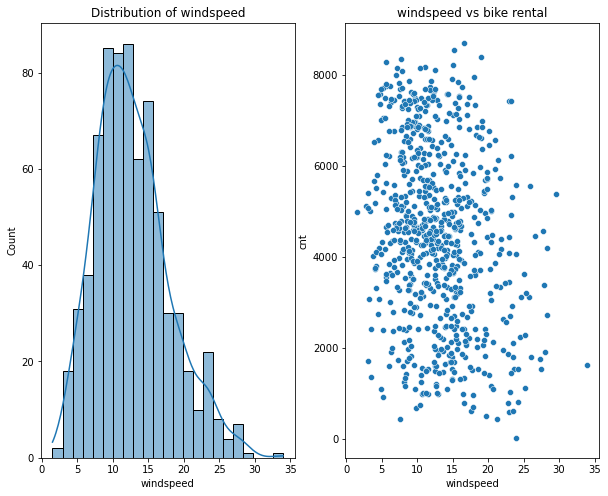

In [271]:
fig, axis = plt.subplots(1, 2, figsize=(10, 8))
plt.subplot(121)
plt.title('Distribution of windspeed')
sns.histplot(df.windspeed, kde=True)
plt.subplot(122)
plt.title('windspeed vs bike rental')
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.show()

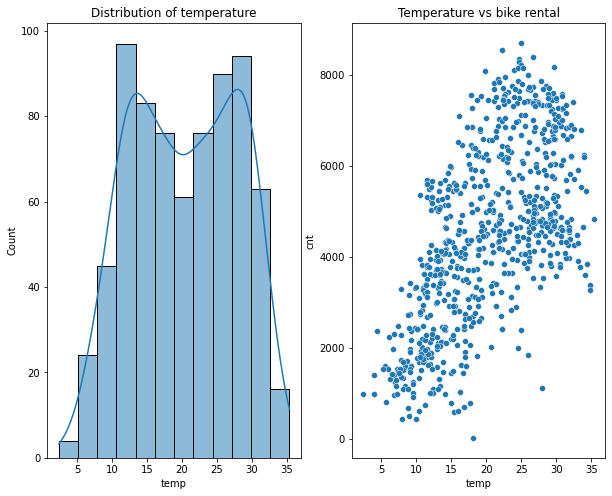

In [272]:
fig, axis = plt.subplots(1, 2, figsize=(10, 8))
plt.subplot(121)
plt.title('Distribution of temperature')
sns.histplot(df.temp, kde=True)
plt.subplot(122)
plt.title('Temperature vs bike rental')
sns.scatterplot(x='temp', y='cnt', data=df)
plt.show()

#### temperature has most values between 15 and 30 degree
#### to a surprise the number of bikes rented in a sunny day are higher

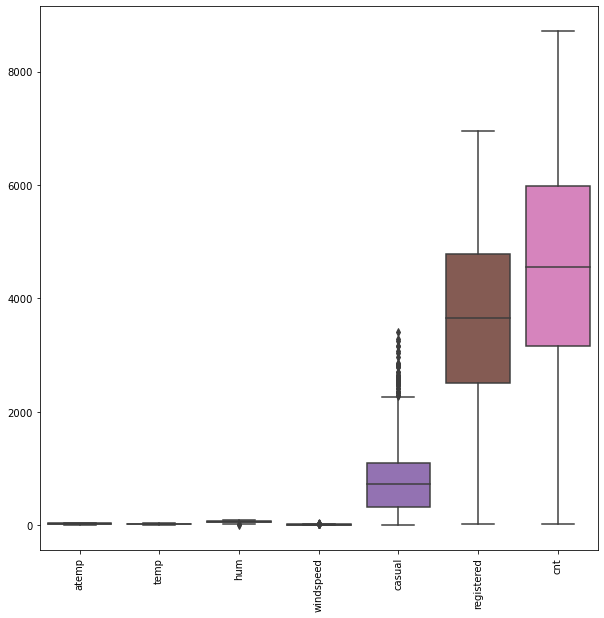

In [273]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df[['atemp','temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.xticks(rotation=90)
plt.show()

#### there arent much outliners in the dataset, only a few in 'casual' which is explainable as some few days tourists visit and rent bikes in a big quantity.

#### 

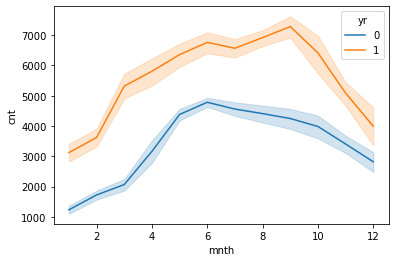

In [274]:
sns.lineplot(x='mnth', y='cnt', hue='yr', data=df);

#### usually bikes are rented during the fall season
#### Bikes rented in 2019 are always more than that in 2018 for every month
#### A trend is followed in which the graph reaches its maximun between july-september then decreases

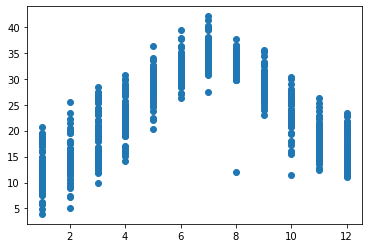

In [275]:
plt.scatter(x = df["mnth"], y=df["atemp"])

#### From scatter plot of temperature per month it can be seen that the count of bikes rented follow a similar pattern as temperature

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

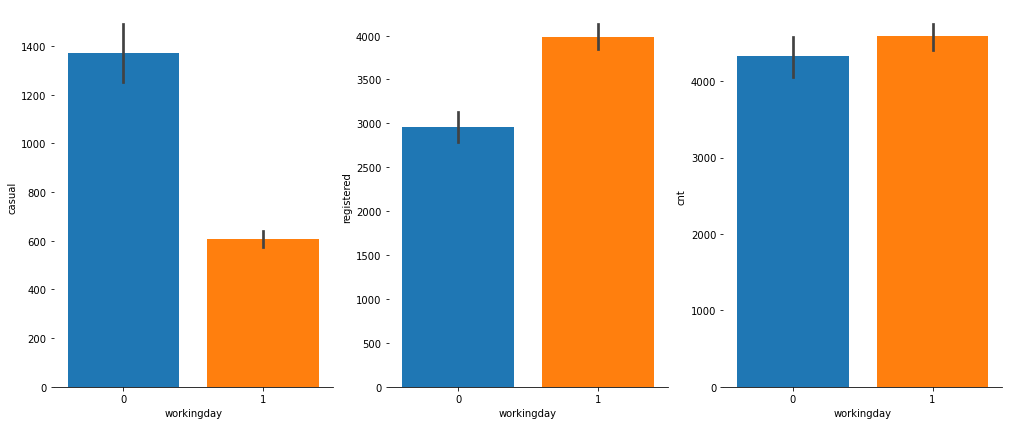

In [276]:
f,axes = plt.subplots(1,3,figsize = (17,7))
sns.despine(left = True)
x = 'workingday'

sns.barplot(x = x , y = 'casual' , data = df, saturation = 1, ax =  axes[0] )
sns.barplot(x = x , y = 'registered' , data = df, saturation = 1, ax = axes[1])
sns.barplot(x = x , y = 'cnt' , data = df, saturation = 1, ax = axes[2])

#### it can be seen that casual rentals are less on weekdays while registered rentals are more and it is vice-versa in case of a holiday or weekend

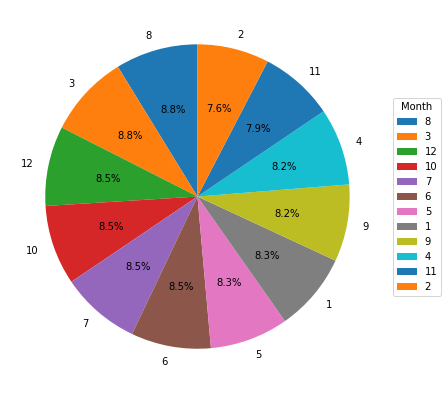

In [277]:
a= df['mnth'][df['holiday']==0].value_counts()
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotext = ax.pie(a, labels = a.index, autopct='%1.1f%%',startangle = 90) 
  
ax.legend(wedges, a.index, 
          title ="Month", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

#### the holidays are distributed equally in every month 

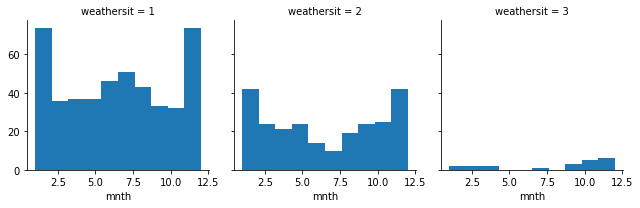

In [278]:
g = sns.FacetGrid(df, col='weathersit')
g.map(plt.hist,'mnth')

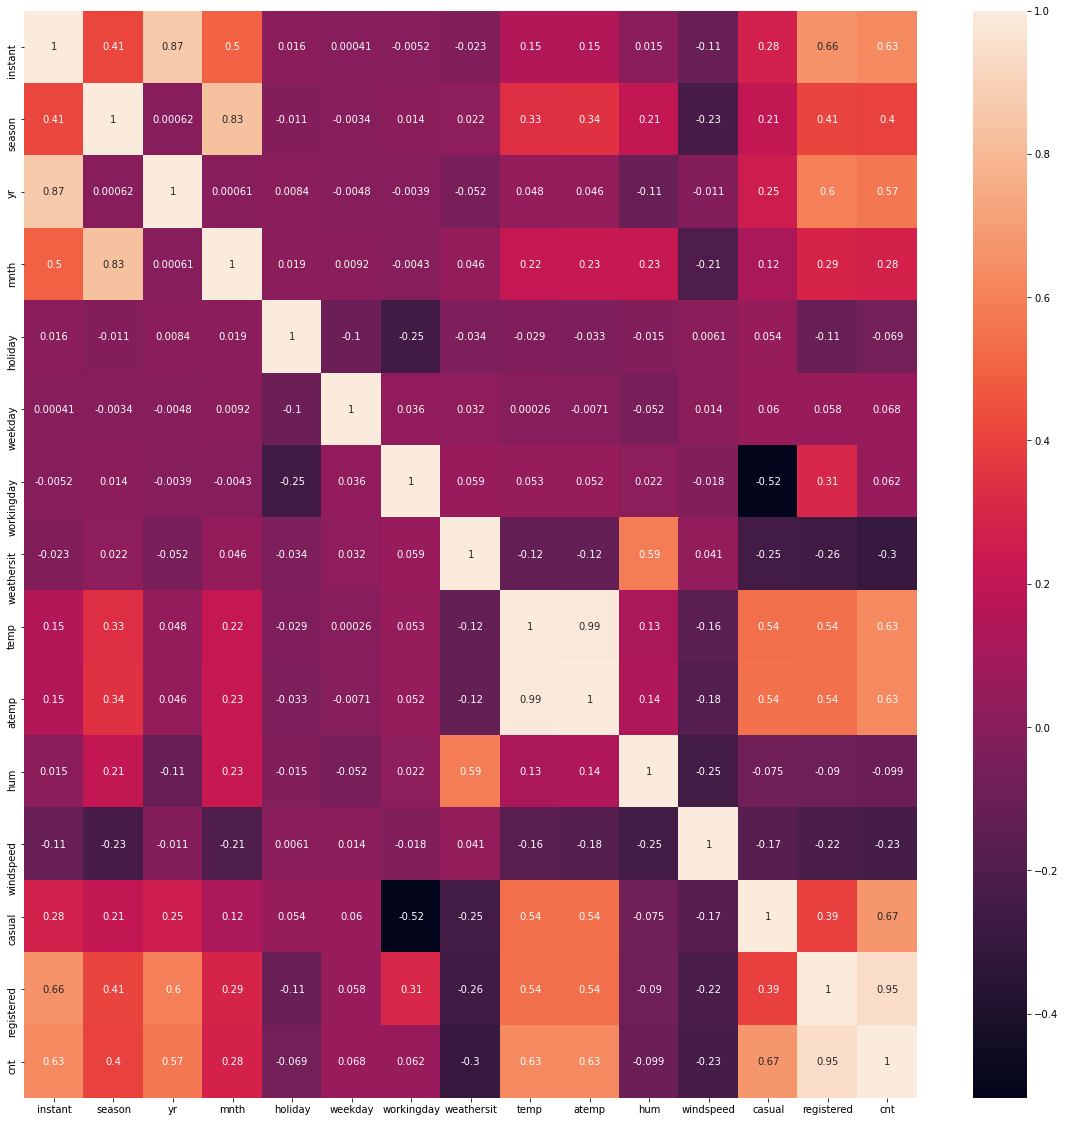

In [279]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Conclusions made from heatmap:
#### The count increases by year
#### Registered bikes are more used on working day and casual rentals are more on holidays and weekend
#### More the value of weathersit less are the bikes rented and it is directly proportional to humidity
#### Day of the week is not much correlated to any other feature or rental count
#### Temperature and feeling temperature are very much correlated, so for a predictive model one of them can be removed.
#### More the temperature more is the rental count.
#### Speed of wind is inversly coreelated to rental count.
#### Casual bikes are more rentend when there are holiday seasons and both casual and registered uses are independent of climatic factors like temp, weather situation.
#### the demand of bikes will be lower on a rainy day , similarly higher humidity lower sell

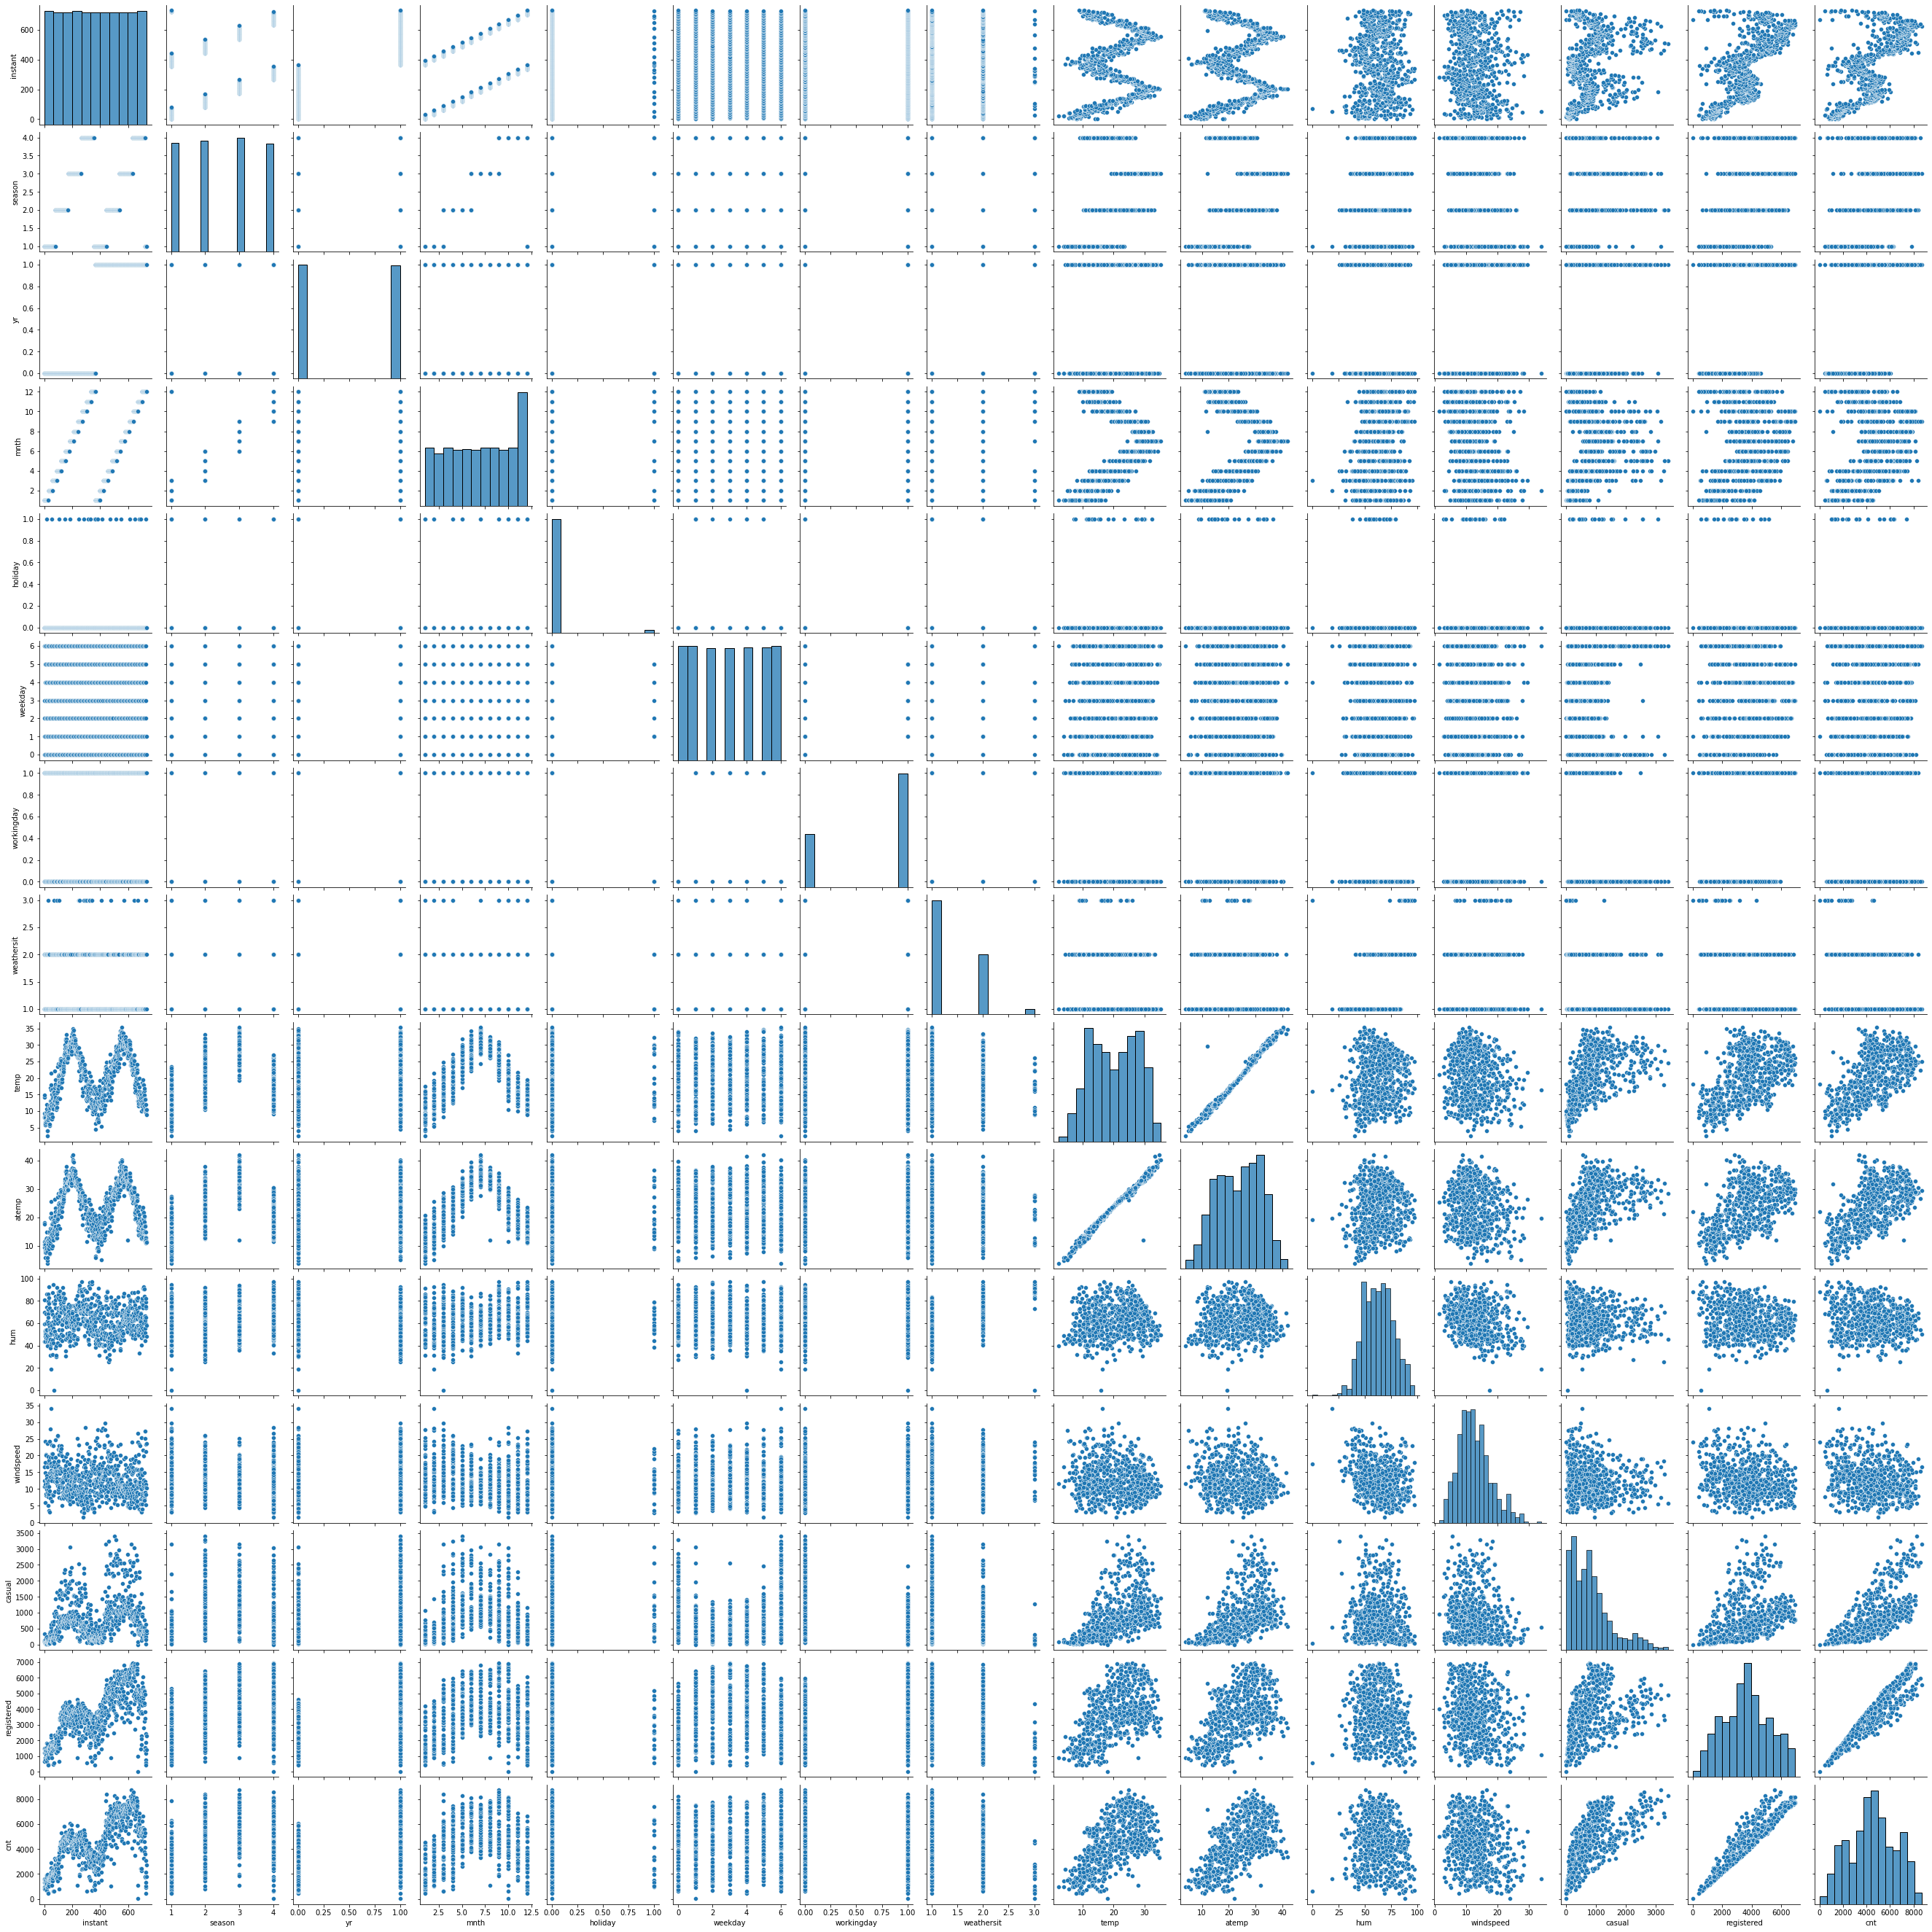

In [280]:
sns.pairplot(df)

## Implementing Machine Learning Models

In [301]:
X = df.drop(['instant','dteday', 'casual', 'registered','cnt','temp'], axis = 1)
Y = df['cnt']
X_train = train_df.drop(['instant','dteday', 'casual', 'registered','cnt','temp'], axis = 1)
Y_train = train_df['cnt']
X_test  = test_df.drop(['instant','dteday', 'casual', 'registered','cnt','temp'], axis = 1)
Y_test = test_df['cnt']

In [282]:
from sklearn.metrics import r2_score
def feature_importance(model):
    forest_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    fig, ax = plt.subplots()
    forest_importances.plot.bar( ax=ax)
    fig.tight_layout()

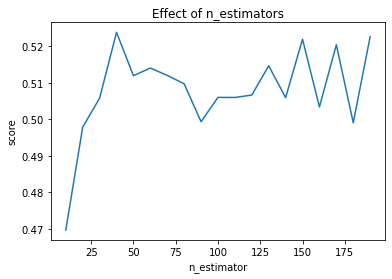

In [283]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [284]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, Y_train)

RandomForestRegressor()

-0.051017542593719156


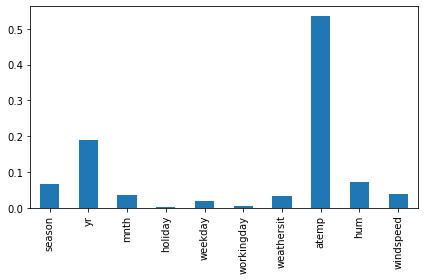

In [285]:
Y_rf = rf.predict(X_test)
print(r2_score(Y_rf, Y_test))
feature_importance(rf)

In [286]:
import lightgbm as lgb
params = {"reg_alpha": [0.01, 0.05, 0.1, 0.5, 1, 1.5],
          "learning_rate": [0.01, 0.05, 0.1, 0.5, 1, 1.5],
          "application": ['regressiomn', 'binary', 'nulticlass']}
lgb= lgb.LGBMRegressor(num_iterations = 10000, learning_rate = 0.05)
lgb.fit(X_train, Y_train, eval_metric = 'l2')

/home/harsh/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(learning_rate=0.05, num_iterations=10000)

0.280229512150848


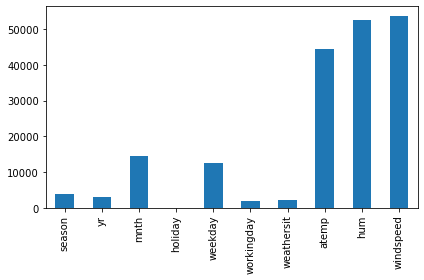

In [287]:
Y_lgb = lgb.predict(X_test)
print(r2_score(Y_lgb, Y_test))
feature_importance(lgb)

In [331]:
import xgboost as xgb
params = {"depth": np.arange(3,10,1),
          "random_strength": [0.01, 0.05, 0.1, 0.5, 1, 1.5]}
xg=xgb.XGBRegressor(
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=3,
                 min_child_weight=0.05,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
xg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=0.05, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

0.4770817312342748


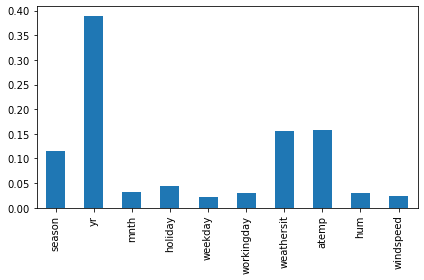

In [333]:
Y_xgb = xg.predict(X_test)
print(r2_score(Y_xgb, Y_test))
feature_importance(xg)

### Model for further predctions 

In [336]:
model = xgb.XGBRegressor(
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=3,
                 min_child_weight=0.05,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=0.05, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

## Conclusions:
#### The best R2 score was achieved  by XGBoost model 
#### Reasons for a low accuracy can be the training data is very less and test dataset is nearly around 50% of the trainig data which is relatively big
#### Acoording to feature importance graph : year, season, weathersit and feeling temperature play an important role in predtiction, these are important because:
#### > The count of cycles rented increade with year , which is true as the population, technology, information increase with years
#### > Season is important as in particular seasons which are for vacations casual rental increases but it does not much affect registered rentals so overall count increases
#### > Weather situation is important as people tend to less use nikes if situation is bad and prefer it on a sunny day
#### > Feeling temp also plays an important role as people prefer a bike on  sunny day 
#### At current lockdown the business is affected but after lockdown the business will bloom as the work from home situation will change and more peole would like to travel and because people would like to have a personal transport rather than a public transport due to fear of covid